In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# Set parameters
IMAGE_SIZE = 224
BATCH_SIZE = 32
N_CLASSES = 9  # Number of classes in the dataset
LEARNING_RATE = 1e-4
EPOCHS = 10

In [3]:
# Load EfficientNetB0 with pre-trained weights
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

In [4]:
# Freeze the base model layers
base_model.trainable = False

In [5]:
# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(N_CLASSES, activation='softmax')(x)

In [6]:
# Create the model
model = Model(inputs=base_model.input, outputs=output)

In [7]:
#dividing the dataset for training , test and validation pourpose
#70% ==> training
#30% ==> 15% validation , 15% test

In [8]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
data_dir = r'C:\Users\ASUS\OneDrive\Desktop\mini_project\Plant_Species_Indentification\data'

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2
)

In [15]:
train_ds = datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 3194 images belonging to 9 classes.


In [16]:
val_ds = datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 794 images belonging to 9 classes.


In [21]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 584s 5s/step - accuracy: 0.2136 - loss: 2.1248 - val_accuracy: 0.1008 - val_loss: 2.1991
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 393s 4s/step - accuracy: 0.5872 - loss: 1.7227 - val_accuracy: 0.1171 - val_loss: 2.2048
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 402s 4s/step - accuracy: 0.8034 - loss: 1.3032 - val_accuracy: 0.1071 - val_loss: 2.3753
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 410s 4s/step - accuracy: 0.8879 - loss: 0.9140 - val_accuracy: 0.1134 - val_loss: 2.2549
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 446s 4s/step - accuracy: 0.9405 - loss: 0.5977 - val_accuracy: 0.1637 - val_loss: 2.1001
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 446s 4s/step - accuracy: 0.9639 - loss: 0.3888 - val_accuracy: 0.3174 - val_loss: 1.7700
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1909s 19s/step - accuracy: 0.9726 - loss: 0.2594 - val_accuracy: 0.5176 - val_loss: 1.4419
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 396s 4s/step - accuracy: 0.9837 - loss: 0.1744 - val_ac

In [17]:
# Fine-tune the model
base_model.trainable = True  # Unfreeze base model layers

In [18]:
# Recompile with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# Fine-tune the model
history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    verbose=1
)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 615s 6s/step - accuracy: 0.9934 - loss: 0.0762 - val_accuracy: 0.8237 - val_loss: 0.6541
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 592s 6s/step - accuracy: 0.9909 - loss: 0.0753 - val_accuracy: 0.8325 - val_loss: 0.6155
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 403s 4s/step - accuracy: 0.9936 - loss: 0.0596 - val_accuracy: 0.8476 - val_loss: 0.5769
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 424s 4s/step - accuracy: 0.9907 - loss: 0.0551 - val_accuracy: 0.8715 - val_loss: 0.5263
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 661s 7s/step - accuracy: 0.9951 - loss: 0.0428 - val_accuracy: 0.8741 - val_loss: 0.4489


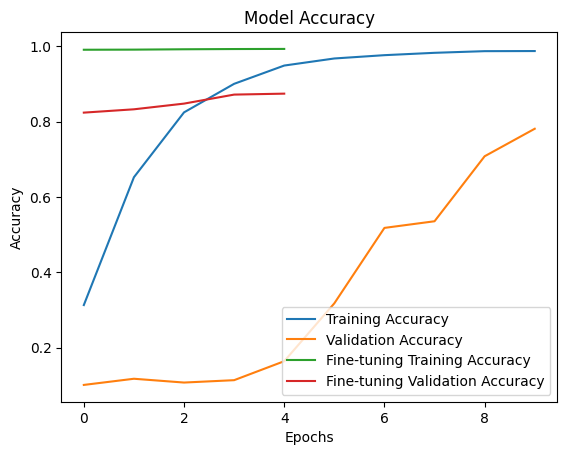

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_fine.history['accuracy'], label='Fine-tuning Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Fine-tuning Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.8730 - loss: 0.4575
Validation Accuracy: 87.53%


In [26]:
from tensorflow.keras.models import Sequential

model_version = 1
# Save the model in the .keras format (recommended)
model.save("../models/saved_model3.keras")

# OR save it in .h5 format
#model.save("../models/saved_model3.h5")

In [28]:
print("y_true length:", len(y_true))
print("y_pred length:", len(y_pred))
print("Unique values in y_true:", np.unique(y_true))
print("Unique values in y_pred:", np.unique(y_pred))

y_true length: 672
y_pred length: 640
Unique values in y_true: [0 1 2 3 4 5 6 7 8]
Unique values in y_pred: [0 1 2 3 4 5 6 7 8]


In [29]:
print("Class Names:", class_names)

Class Names: ['Berry', 'Fig', 'Guava', 'Orange', 'Palm', 'Persimmon', 'Tomato', 'apple', 'grape']


In [30]:
import matplotlib
print("Matplotlib backend:", matplotlib.get_backend())

Matplotlib backend: module://matplotlib_inline.backend_inline


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step
Classification Report:
              precision    recall  f1-score   support

       Berry       0.82      1.00      0.90        23
         Fig       0.98      1.00      0.99        42
       Guava       0.72      1.00      0.84        46
      Orange       0.83      0.87      0.85        46
        Palm       0.95      0.95      0.95        37
   Persimmon       1.00      1.00      1.00        38
      Tomato       0.92      1.00      0.96        11
       apple       1.00      0.26      0.42        38
       grape       0.97      1.00      0.99        33

    accuracy                           0.89     

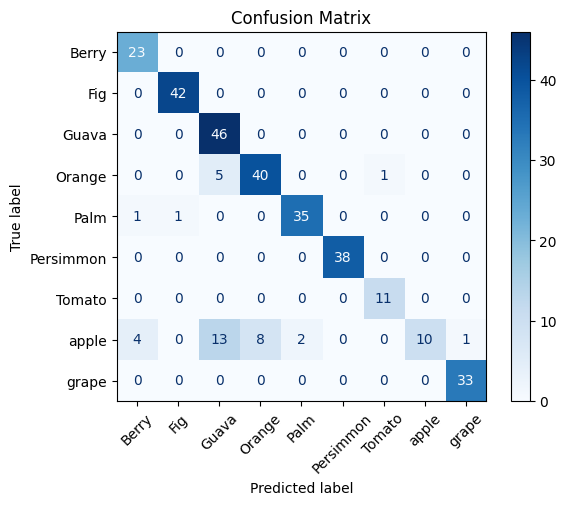

In [31]:
# Initialize true and predicted labels
y_true, y_pred = [], []

# Limit the number of batches to check if the issue is with data
num_batches = 10  # Set this to a reasonable number for debugging

# Iterate through the validation generator with a limit on number of batches
for i, (images, labels) in enumerate(val_ds):
    if i >= num_batches:
        break  # Stop after a certain number of batches
    
    # Flatten true labels (handle one-hot encoding or class indices)
    if len(labels.shape) < 10:  # If one-hot encoded
        y_true.extend(np.argmax(labels, axis=1))  # Convert one-hot encoded labels to class indices
    else:
        y_true.extend(labels)  # If labels are already class indices

    # Predict and flatten predicted labels
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))  # Get the predicted class indices

# Convert lists to numpy arrays for compatibility with scikit-learn
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualizing the confusion matrix with a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [33]:
# Display model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 12,560,056 (47.91 MB)

 Trainable params: 4,172,677 (15.92 MB)

 Non-trainable params: 42,023 (164.16 KB)

 Optimizer params: 8,345,356 (31.84 MB)